# Exibir variações temporais de duas Séries
Prof. Fernando Amaral

In [3]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
df = pd.read_csv('italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')

In [5]:
df.index = pd.to_datetime(df.index) 
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [6]:
depth_magn = df.where((df["Magnitude"] >= 3.0)).dropna()[["Magnitude", "Depth/Km"]]
dm = depth_magn.groupby(depth_magn.index.hour).mean()
dm.head()

,Magnitude,Depth/Km
Time,,
0,3.219048,9.071429
1,3.341667,9.720833
2,3.271429,9.457143
3,3.393478,9.556522
4,3.369811,9.173585


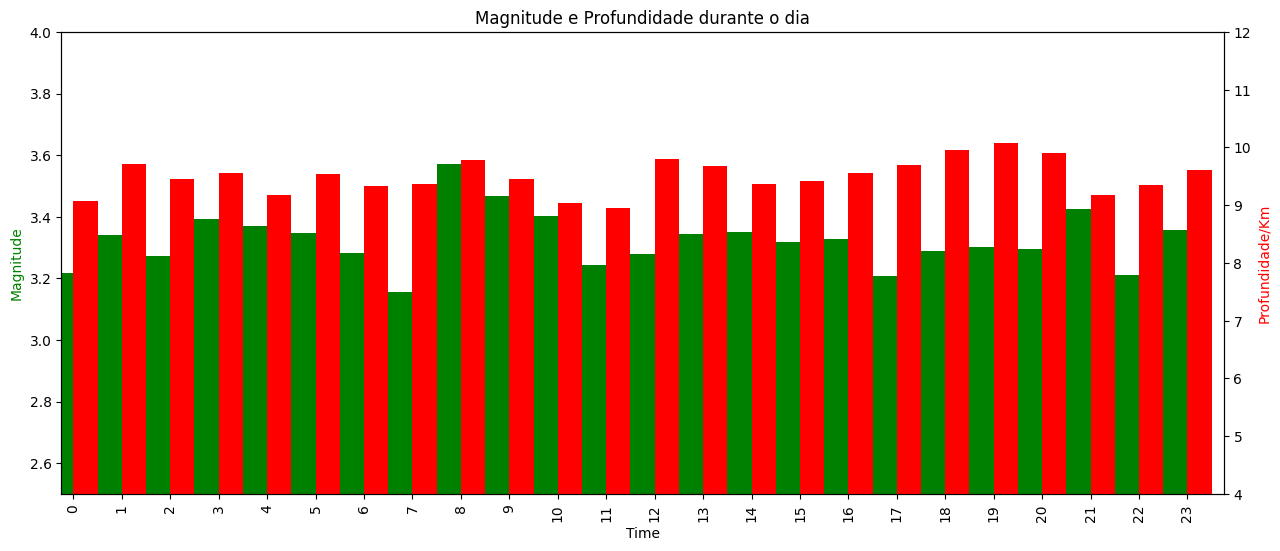

In [7]:
fig = plt.figure()
#um gráfico
ax = fig.add_subplot(111)
ax.set_ylim([2.5, 4.0])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Hora do Dia")
ax.yaxis.label.set_color("green")

#novo eixo, compartilhado com ax
ax2 = ax.twinx()
ax2.set_ylim([4.0, 12])
ax2.set_ylabel("Profundidade/Km")
ax2.set_xlabel("Hora do Dia")
ax2.yaxis.label.set_color("red")

dm["Magnitude"].plot(kind="bar", color='green', ax=ax, width=0.5, position=1)
dm["Depth/Km"].plot(kind="bar", color="red", ax=ax2, width=0.5, position=0)

plt.title("Magnitude e Profundidade durante o dia")
plt.show()